# SPMpy Quickstart v0.1

SPMpy is an open-source collection of Python tools for analyzing multi-dimensional scanning probe microscopy (SPM) data,
including STM/S and AFM. It uses **`xarray`** as the primary data container to preserve both data and metadata.

**Authors:** Dr. Jewook Park (CNMS, ORNL)  
**Contact:** parkj1@ornl.gov

### Stages in this notebook
- **Stage 0:** Environment check + repository bootstrap
- **Stage 1:** Data loading (Nanonis `.sxm`, `.3ds`) into `xarray.Dataset`
- **Stage 2:** (Basic) Visualization and analysis 

### License note
This repository is provided for internal and collaborative review. Licensing terms will be finalized according to ORNL/DOE policies.


<a id="Navigation"></a>

## Notebook Navigation

- [**Stage 0**](#Stage0) — Environment check & bootstrap
  - Step 1: Set `REPO_ROOT` and import `spmpy`
  - Step 2: Run structured environment diagnostics
  - Step 3: Environment diagnostics 
- [**Stage 1**](#Stage1) — Data loading (STM/SPM files)
  - [Stage 1.1](#Stage1.1): 2D image data (`.sxm`) → `xarray.Dataset`
  - [Stage 1.2](#Stage1.2): GridSpectroscopy (`.3ds`) → `xarray.Dataset`
- [**Stage 2**](#Stage2) — Data-processing & visualization 
    - [Stage2.1] (#`ds_sxm` preprocessing)

**Tip:** Run cells from top to bottom. Markdown cells describe what to do and what to expect.


<a id="Stage0"></a>

# Stage 0 — Step 1: Bootstrap the local repository

[⬆ Back to Navigation](#Navigation)


Set `REPO_ROOT` to your local SPMpy clone folder, add it to `sys.path`, then import `spmpy`.


### Installation and Loading (Internal Use)

Since this repository is now **private**, SPMpy is not installed via public package managers
(e.g., `pip install`) and should be accessed **only through direct cloning** of the repository.

#### Access Requirement
To use SPMpy, you must:
- Have received an **invitation** to this private GitHub repository

If you do not have access, please contact the repository maintainer, Jewook Park (parkj1@ornl.gov).

---

#### Clone the Private Repository

After accepting the GitHub invitation, clone the repository to your local machine:

```bash
git clone git@github.com:jewook-park/SPMpy.git

In [1]:
import sys
from pathlib import Path

# IMPORTANT: set this to your local SPMpy repository root
REPO_ROOT = Path(r"C:\\Users\\gkp\\Documents\\GitHub\\SPMpy")

if not REPO_ROOT.exists():
    raise RuntimeError(
        f"[SPMpy] Repo root does not exist: {REPO_ROOT}\n"
        "[Action] Edit REPO_ROOT to match your local clone location."
    )

if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

import spmpy
print('[SPMpy] Imported from:', spmpy.__file__)

[SPMpy] Imported from: C:\Users\gkp\Documents\GitHub\SPMpy\spmpy\__init__.py


## Stage-0 Step 2 — Environment diagnostic (read-only)

[Info] Package manager priority: mamba -> conda
[Info] Detected JupyterLab major version: 4
[Step 1] Widgets ...
[OK] ipywidgets already importable.
[OK] jupyterlab_widgets already importable.
[Info] JupyterLab >=4 detected: no lab build required.
[Step 2] Plotly ...
[OK] plotly already importable.
[Step 3] HoloViz stack ...
[OK] panel already importable.
[OK] holoviews already importable.
[OK] jupyter_bokeh already importable.
[Step 4] Stage-1 minimum scientific stack ...
[OK] numpy already importable.
[OK] xarray already importable.
[OK] matplotlib already importable.
[OK] scipy already importable.
[OK] pandas already importable.
[OK] skimage already importable.
[OK] xrft already importable.
[OK] hvplot already importable.
[OK] gwyfile already importable.
[OK] netCDF4 already importable.
[OK] h5netcdf already importable.
[OK] pptx already importable.
[OK] PyQt5 already importable.
[Step 5] Best-effort visualization backend config ...


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
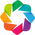

[Config] Bokeh and HoloViews activated.

[Done] Base environment setup cell finished.
[OK] torch: 2.9.1+cpu
[OK] scikit-learn: 1.7.1

================ SPMpy ENV SUMMARY ================
[SPMpy] ENV OK ✅  (Required deps satisfied)

[Action] You may proceed to Quickstart.



In [2]:
# Safe import of env_check module (explicit module path)
try:
    import spmpy.utils.env_check_v2025Dec_30_revised as env_check
except ImportError as e:
    raise RuntimeError(
        '[SPMpy] Failed to import env_check module.\n'
        'Reason: module file not found or misnamed.\n'
        'Action: verify file name and restart kernel.'
    ) from e

In [4]:
from dataclasses import dataclass

@dataclass
class EnvStatus:
    ok: bool = False
    needs_restart: bool = False
    inconclusive: bool = False
    missing: list | None = None

def interpret_env_check(env):
    status = EnvStatus()

    if hasattr(env, 'ENV_OK'):
        status.ok = bool(env.ENV_OK)
        status.needs_restart = bool(getattr(env, 'INSTALLED_NOW', False))
        status.missing = getattr(env, 'MISSING_REQUIRED', None)
        return status

    status.inconclusive = True
    return status

status = interpret_env_check(env_check)

## Stage 0 — Step 3: Run environment diagnostics  --> Decision & next action 

Based on the diagnostic result, follow the instruction printed by the next cell.

This checks whether required packages are installed and whether a kernel restart is needed.
The next cell will create a `status` object used by the decision step.



In [5]:
if status.ok and not status.needs_restart:
    print('[SPMpy] ✅ Environment ready.')
    print('[Next] Continue to Stage-1 below (Data Loading).')

elif status.ok and status.needs_restart:
    print('[SPMpy] ✅ Environment updated.')
    print('[Action] Restart the kernel, then re-run Stage-0 in this notebook.')

elif status.inconclusive:
    print('[SPMpy] ⚠ Environment status inconclusive.')
    print('[Action] Run the diagnostic notebook:')
    print('        notebooks/env_check_v_2025Dec_30_revised.ipynb')
    print('[Then] Return here, restart kernel if needed, and re-run Stage-0.')

else:
    print('[SPMpy] ❌ Environment not ready.')
    if status.missing:
        print('Missing packages:')
        for m in status.missing:
            print('  -', m)
    print('[Action] Fix the environment, restart kernel, then re-run Stage-0.')

[SPMpy] ✅ Environment ready.
[Next] Continue to Stage-1 below (Data Loading).


<a id="Stage1"></a>
# Stage 1 — File Loading (SXM, 3DS)
[⬆ Back to Navigation](#Navigation)


Stage 1 loads **Nanonis files** and standardizes them into **`xarray.Dataset`** objects.
- [Stage 1.0](#Stage1.0): select folder 
- [Stage 1.1](#Stage1.1): 2D image data (`.sxm`) → `xarray.Dataset`
- [Stage 1.2](#Stage1.2): GridSpectroscopy (`.3ds`) → `xarray.Dataset`

**Important:** Stage 1 performs *loading only* (no plane fit, no flattening, no filtering).
Processing functions will be organized separately under a data-processing module.


<a id="Stage1.0"></a>
### Imports for Stage 1.0
[⬆ Back to Navigation](#Navigation)

In this Quickstart, the I/O logic is not defined inline.
Instead, we import the legacy-compatible I/O functions from the package:
- `select_folder()` — GUI folder picker
- `files_in_folder()` — folder inventory → DataFrame (**no `os.chdir()`**)
- `img2xr()` — `.sxm` → `xarray.Dataset`
- `grid2xr()` — `.3ds` → `xarray.Dataset` (used in Stage 1.2)

This keeps the Quickstart focused on workflow, while the implementation lives in `spmpy/io/`.

#### USE `spmpy_io_library_v0_1_2`



In [6]:
# I/O function set (paired .py lives in: spmpy/io/spmpy_io_library_v0_1.py)
from spmpy.io import spmpy_io_library_v0_1_2 as io

select_folder = io.select_folder
files_in_folder = io.files_in_folder
img2xr = io.img2xr
grid2xr = io.grid2xr

#### Stage 1.0 Step 1 — Select a working folder

Run the next cell to pick a folder that contains your `.sxm` / `.3ds` files.


In [7]:
selected_folder = select_folder()
if selected_folder:
    print(f"Selected folder: {selected_folder}")
else:
    print("No folder selected.")

Selected folder: C:/Users/gkp/OneDrive - Oak Ridge National Laboratory/0_mK STM DATA/2025/20251016 FeGeTe512_PtIr32_LHet_Bfield_Jewook


#### Stage 1.0 Step 2 — Inventory the folder as a DataFrame

This creates a DataFrame inventory so you can reproducibly select files by name.

**Note:** Because we do not use `os.chdir()`, the DataFrame includes a full `file_path` column.
Use `file_path` when loading files, and define an explicit `output_dir` when saving results later.


In [8]:
folder_path = selected_folder
print(f"Selected folder: {folder_path}")

files_df = files_in_folder(folder_path)
files_df

Selected folder: C:/Users/gkp/OneDrive - Oak Ridge National Laboratory/0_mK STM DATA/2025/20251016 FeGeTe512_PtIr32_LHet_Bfield_Jewook
Current Path = C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL
Target Folder = C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\0_mK STM DATA\2025\20251016 FeGeTe512_PtIr32_LHet_Bfield_Jewook
sxm file groups: Fe5GeTe1_PtIr32_LHeT_4_x1_a20251016_20 : # of files = 1
sxm file groups: Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40 : # of files = 17
sxm file groups: Fe5GeTe1_PtIr32_LHeT_5_400mT_x1_a20251016_20 : # of files = 5
sxm file groups: Fe5GeTe1_PtIr32_LHeT_5_400mT_x1_a20251016_00 : # of files = 3
sxm file groups: Fe5GeTe1_PtIr32_LHeT_6_200mT_x1_20251017_20 : # of files = 7
sxm file groups: Cu(111)_PtIr32_LHeT_2_x1_a20251016_20 : # of files = 1
sxm file groups: Fe5GeTe1_PtIr32_LHeT_6_200mT_x1_20251018_20 : # of files = 8
sxm file groups: Fe5GeTe1_PtIr32_LHeT_6_200mT_x1_20251019_30 : # of files = 1
sxm fi

,group,num,file_name,type,folder_path,file_path
0,Cu(111)_PtIr32_LHeT_2_x1_a20251016_20,001,Cu(111)_PtIr32_LHeT_2_x1_a20251016_20001.sxm,sxm,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
1,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40,001,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40001.sxm,sxm,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
2,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40,002,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40002.sxm,sxm,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
3,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40,003,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40003.sxm,sxm,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
4,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40,004,Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40004.sxm,sxm,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
...,...,...,...,...,...,...
113,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20003,NaN,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20003...,gwy,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
114,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20004,NaN,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20004...,gwy,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
115,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20005,NaN,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20005...,gwy,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...
116,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20006,NaN,Fe5GeTe1_PtIr32_LHeT_6_400mT_x1_20251017_20006...,gwy,C:\Users\gkp\OneDrive - Oak Ridge National Lab...,C:\Users\gkp\OneDrive - Oak Ridge National Lab...


<a id="Stage1.1"></a>
## Stage 1.1 — 2D Image Data Loading (`.sxm`)
[⬆ Back to Navigation](#Navigation)

1. List files in the folder as a DataFrame (for reproducible selection).
2. Choose an `.sxm` file name from the table.
3. Load the file into an **`xarray.Dataset`** using `img2xr`.

~~**Why this workflow**~~
~~This is intentionally designed to support future workflows where you load **multiple files** and build a dataset collection in a consistent way.~~


#### Stage 1.1 Step 0 — Select an `.sxm` file from the inventory

Pick a file name from the DataFrame. You can keep a list for future multi-file loading.


In [9]:
# List all SXM files
file_list = files_df[files_df.type=='sxm'].file_name
file_list

0          Cu(111)_PtIr32_LHeT_2_x1_a20251016_20001.sxm
1       Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40001.sxm
2       Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40002.sxm
3       Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40003.sxm
4       Fe5GeTe1_PtIr32_LHeT_0_0T_x1_20251020_40004.sxm
                            ...                        
85    Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40...
86    Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40...
87    Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40...
88    Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40...
89                 Grid Spectroscopy_400mT_001_topo.sxm
Name: file_name, Length: 90, dtype: object

In [10]:
#files_df[files_df.file_name.str.contains('x1_20251020_40003')]

In [14]:
# Choose one file (edit as needed)
sxm_name = file_list.iloc[0] if len(file_list) else None
sxm_name = file_list.iloc[88] if len(file_list) else None
sxm_name

'Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40010.sxm'

#### Stage 1.1 Step 1 — Load the SXM file into an `xarray.Dataset`

No plotting is performed here. The returned `xarray.Dataset` is sufficient for validation.
* Only directly measured SXM files are supported at this stage; extracted or post-processed SXM files are intentionally excluded from loading.

In [15]:
from pathlib import Path

if sxm_name is None:
    raise RuntimeError('No .sxm files found in the selected folder.')

# Prefer explicit file_path if provided by files_in_folder()
if 'file_path' in files_df.columns:
    sxm_path = Path(files_df.loc[files_df.file_name == sxm_name, 'file_path'].iloc[0])
else:
    sxm_path = Path(folder_path) / sxm_name

print('[SPMpy] Loading:', sxm_path)

ds_sxm = img2xr(str(sxm_path), center_offset=False)
ds_sxm

[SPMpy] Loading: C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\0_mK STM DATA\2025\20251016 FeGeTe512_PtIr32_LHet_Bfield_Jewook\Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40010.sxm


<xarray.Dataset> Size: 189MB
Dimensions:          (Y: 512, X: 1536)
Coordinates:
  * X                (X) float64 12kB -5.939e-07 -5.939e-07 ... -5.519e-07
  * Y                (Y) float64 4kB 1.447e-07 1.447e-07 ... 1.587e-07 1.587e-07
Data variables: (12/60)
    CURR_P1_fwd      (Y, X) >f4 3MB -8.439e-10 -8.101e-10 ... -7.792e-10
    CURR_P1_bwd      (Y, X) >f4 3MB -7.848e-10 -8.298e-10 ... -8.317e-10
    P1__Bias_P1_fwd  (Y, X) >f4 3MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    P1__Bias_P1_bwd  (Y, X) >f4 3MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    Z_P1_fwd         (Y, X) >f4 3MB -3.581e-08 -3.581e-08 ... -3.585e-08
    Z_P1_bwd         (Y, X) >f4 3MB -3.581e-08 -3.58e-08 ... -3.585e-08
    ...               ...
    Z_P6_fwd         (Y, X) >f4 3MB -3.58e-08 -3.58e-08 ... -3.583e-08
    Z_P6_bwd         (Y, X) >f4 3MB -3.58e-08 -3.58e-08 ... -3.583e-08
    LIX_P6_fwd       (Y, X) >f4 3MB 2.297e-11 2.561e-11 ... 2.381e-11 2.41e-11
    LIX_P6_bwd       (Y, X) >f4 3MB 2.697e-11 2.737e-11 ... 2.014e-11 2.084e-11
    LIY_P6_fwd       (Y, X) >f4 3MB 1.206e-11 1.085e-11 ... 1.269e-11 1.3e-11
    LIY_P6_bwd       (Y, X) >f4 3MB 1.287e-11 1.282e-11 ... 1.263e-11 1.113e-11
Attributes: (12/13)
    multipass:       1
    n_passes:        6
    title:           Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40010.sxm\n4...
    tip:             PtIr
    sample:          To Be Announced
    image_size:      [4.2e-08, 1.4e-08]
    ...              ...
    Y_spacing:       2.734375e-11
    channels_index:  [{"var": "CURR_P1_fwd", "pass_index": 1, "dir": "forward...
    bias_table:      [{"pass_index": 1, "bias_fwd_V": -0.5, "bias_bwd_V": -0....
    scan_angle_deg:  -24.000000000000004
    scan_dir:        up
    data_vars_list:  ["CURR_P1_fwd", "CURR_P1_bwd", "P1__Bias_P1_fwd", "P1__B...

#### Stage 1.1 Step 2— Add experiment metadata (attrs)

SPMpy keeps experiment context in `Dataset.attrs`. Edit the values below to match your experiment.
These fields are user-defined and will be used later in analysis/plotting pipelines.


In [18]:
# Edit these values for your dataset
'''
ds_sxm.attrs['tip'] = 'PtIr'
ds_sxm.attrs['sample'] = 'Cu(111)'
ds_sxm.attrs['ref_a0_nm'] = 0.257
ds_sxm.attrs['temperature'] = '4.35K'
'''

# Edit these values for your dataset
ds_sxm.attrs['tip'] = 'PtIr'

ds_sxm.attrs['sample'] = 'Fe5GeTe2'
ds_sxm.attrs['ref_a0_nm'] = 0.404 
ds_sxm.attrs['temperature'] = '40 mK'

#ds_sxm.attrs['sample'] = 'HOPG'
#ds_sxm.attrs['ref_a0_nm'] = 0.254 
#ds_sxm.attrs['temperature'] = '300K'

'''
# Example alternative (commented):
# ds_sxm.attrs['tip'] = 'Ni'
# ds_sxm.attrs['sample'] = 'FeTeSe'
# ds_sxm.attrs['ref_a0_nm'] = 0.384
# ds_sxm.attrs['temperature'] = '40mK'
'''
ds_sxm

<xarray.Dataset> Size: 189MB
Dimensions:          (Y: 512, X: 1536)
Coordinates:
  * X                (X) float64 12kB -5.939e-07 -5.939e-07 ... -5.519e-07
  * Y                (Y) float64 4kB 1.447e-07 1.447e-07 ... 1.587e-07 1.587e-07
Data variables: (12/60)
    CURR_P1_fwd      (Y, X) >f4 3MB -8.439e-10 -8.101e-10 ... -7.792e-10
    CURR_P1_bwd      (Y, X) >f4 3MB -7.848e-10 -8.298e-10 ... -8.317e-10
    P1__Bias_P1_fwd  (Y, X) >f4 3MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    P1__Bias_P1_bwd  (Y, X) >f4 3MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    Z_P1_fwd         (Y, X) >f4 3MB -3.581e-08 -3.581e-08 ... -3.585e-08
    Z_P1_bwd         (Y, X) >f4 3MB -3.581e-08 -3.58e-08 ... -3.585e-08
    ...               ...
    Z_P6_fwd         (Y, X) >f4 3MB -3.58e-08 -3.58e-08 ... -3.583e-08
    Z_P6_bwd         (Y, X) >f4 3MB -3.58e-08 -3.58e-08 ... -3.583e-08
    LIX_P6_fwd       (Y, X) >f4 3MB 2.297e-11 2.561e-11 ... 2.381e-11 2.41e-11
    LIX_P6_bwd       (Y, X) >f4 3MB 2.697e-11 2.737e-11 ... 2.014e-11 2.084e-11
    LIY_P6_fwd       (Y, X) >f4 3MB 1.206e-11 1.085e-11 ... 1.269e-11 1.3e-11
    LIY_P6_bwd       (Y, X) >f4 3MB 1.287e-11 1.282e-11 ... 1.263e-11 1.113e-11
Attributes: (12/15)
    multipass:       1
    n_passes:        6
    title:           Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40010.sxm\n4...
    tip:             PtIr
    sample:          Fe5GeTe2
    image_size:      [4.2e-08, 1.4e-08]
    ...              ...
    bias_table:      [{"pass_index": 1, "bias_fwd_V": -0.5, "bias_bwd_V": -0....
    scan_angle_deg:  -24.000000000000004
    scan_dir:        up
    data_vars_list:  ["CURR_P1_fwd", "CURR_P1_bwd", "P1__Bias_P1_fwd", "P1__B...
    ref_a0_nm:       0.404
    temperature:     40 mK

In [19]:
ds_sxm

<xarray.Dataset> Size: 189MB
Dimensions:          (Y: 512, X: 1536)
Coordinates:
  * X                (X) float64 12kB -5.939e-07 -5.939e-07 ... -5.519e-07
  * Y                (Y) float64 4kB 1.447e-07 1.447e-07 ... 1.587e-07 1.587e-07
Data variables: (12/60)
    CURR_P1_fwd      (Y, X) >f4 3MB -8.439e-10 -8.101e-10 ... -7.792e-10
    CURR_P1_bwd      (Y, X) >f4 3MB -7.848e-10 -8.298e-10 ... -8.317e-10
    P1__Bias_P1_fwd  (Y, X) >f4 3MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    P1__Bias_P1_bwd  (Y, X) >f4 3MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5 -0.5
    Z_P1_fwd         (Y, X) >f4 3MB -3.581e-08 -3.581e-08 ... -3.585e-08
    Z_P1_bwd         (Y, X) >f4 3MB -3.581e-08 -3.58e-08 ... -3.585e-08
    ...               ...
    Z_P6_fwd         (Y, X) >f4 3MB -3.58e-08 -3.58e-08 ... -3.583e-08
    Z_P6_bwd         (Y, X) >f4 3MB -3.58e-08 -3.58e-08 ... -3.583e-08
    LIX_P6_fwd       (Y, X) >f4 3MB 2.297e-11 2.561e-11 ... 2.381e-11 2.41e-11
    LIX_P6_bwd       (Y, X) >f4 3MB 2.697e-11 2.737e-11 ... 2.014e-11 2.084e-11
    LIY_P6_fwd       (Y, X) >f4 3MB 1.206e-11 1.085e-11 ... 1.269e-11 1.3e-11
    LIY_P6_bwd       (Y, X) >f4 3MB 1.287e-11 1.282e-11 ... 1.263e-11 1.113e-11
Attributes: (12/15)
    multipass:       1
    n_passes:        6
    title:           Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40010.sxm\n4...
    tip:             PtIr
    sample:          Fe5GeTe2
    image_size:      [4.2e-08, 1.4e-08]
    ...              ...
    bias_table:      [{"pass_index": 1, "bias_fwd_V": -0.5, "bias_bwd_V": -0....
    scan_angle_deg:  -24.000000000000004
    scan_dir:        up
    data_vars_list:  ["CURR_P1_fwd", "CURR_P1_bwd", "P1__Bias_P1_fwd", "P1__B...
    ref_a0_nm:       0.404
    temperature:     40 mK

## End of Stage 1.1

At this point you have a **2D SXM image** loaded as an **`xarray.Dataset`**.

Next:

- [**Stage 2:**](#Stage2) visualization and data-processing steps (plane fit / flattening) from a dedicated module


<a id="Stage1.2"></a>

## Stage 1.2 — GridSpectroscopy (.3ds) loading


[⬆ Back to Navigation](#Navigation)

This section loads a Nanonis GridSpectroscopy file (`.3ds`) and converts it into an `xarray.Dataset`.

### What you will do
1. Select a `.3ds` file name from the folder inventory (`files_df`).
2. Load it with `grid2xr()` using an explicit `file_path`.
3. Add experiment metadata to `ds_grid.attrs`.

**Note:** This stage performs loading only. Processing (plane fit / flattening / filtering) belongs to a
dedicated data-processing module (Stage 2).


In [ ]:
# Select one or more .3ds files from the inventory
file_list_3ds = files_df[files_df.type == '3ds'].file_name
file_list_3ds

In [ ]:
# Choose a single file for loading (edit as needed)
if len(file_list_3ds) == 0:
    raise RuntimeError('No .3ds files found in the selected folder.')

grid_name = file_list_3ds.iloc[0]
print('Selected .3ds file:', grid_name)

In [ ]:
from pathlib import Path

# Prefer explicit file_path if provided by files_in_folder()
if 'file_path' in files_df.columns:
    grid_path = Path(files_df.loc[files_df.file_name == grid_name, 'file_path'].iloc[0])
else:
    grid_path = Path(folder_path) / grid_name

print('[SPMpy] Loading:', grid_path)

ds_grid = grid2xr(str(grid_path))
ds_grid

### Step — Add experiment metadata (attrs)

Edit the values below to match your experiment.
These fields are intentionally user-defined and will be used later in analysis/plotting pipelines.


In [ ]:
# Edit these values for your grid dataset
'''
ds_grid.attrs['tip'] = 'PtIr'
ds_grid.attrs['sample'] = 'Cu(111)'
ds_grid.attrs['ref_a0_nm'] = 0.255
ds_grid.attrs['temperature'] = '4.35K'
'''
# Edit these values for your dataset
ds_grid.attrs['tip'] = 'PtIr'
ds_grid.attrs['sample'] = 'Fe5GeTe2'
ds_grid.attrs['ref_a0_nm'] = 0.404 
ds_grid.attrs['temperature'] = '4.35K'

# Example alternative (commented):
# ds_grid.attrs['tip'] = 'Ni'
# ds_grid.attrs['sample'] = 'FeTeSe'
# ds_grid.attrs['ref_a0_nm'] = 0.384
# ds_grid.attrs['temperature'] = '40mK'

ds_grid

In [ ]:
ds_grid.isel(X=slice(0, 20), Y=slice(0, 20)).to_netcdf("ds_grid.nc")

## End of Stage 1.2

At this point you have:


- `ds_grid`: a GridSpectroscopy dataset loaded as an `xarray.Dataset`

Next (planned):

- [**Stage 2**](#Stage2): Visualization and data-processing steps (plane fit / flattening) from a dedicated module.


<a id="Stage2"></a>

# Stage 2 : Data-processing & visualization 

[⬆ Back to Navigation](#Navigation)


<a id="Stage2.1"></a>
## Stage 2.1 — `ds_sxm` preprocessing

[⬆ Back to Navigation](#Navigation)

* interpolate2D
* plane_fit_xr
* plateau_tilt_xr

In [20]:
from spmpy.preprocess.interpolate2D_xr import interpolate2D_xr 

from spmpy.preprocess.plane_fit_xr import plane_fit_xr 
from spmpy.preprocess.plateau_tilt_xr import plateau_tilt_xr 




In [21]:

ds_sxm = interpolate2D_xr(ds_sxm)

In [22]:
ds_sxm

<xarray.Dataset> Size: 378MB
Dimensions:          (Y: 512, X: 1536)
Coordinates:
  * X                (X) float64 12kB -5.939e-07 -5.939e-07 ... -5.519e-07
  * Y                (Y) float64 4kB 1.447e-07 1.447e-07 ... 1.587e-07 1.587e-07
Data variables: (12/60)
    CURR_P1_fwd      (Y, X) float64 6MB -8.439e-10 -8.101e-10 ... -7.792e-10
    CURR_P1_bwd      (Y, X) float64 6MB -7.848e-10 -8.298e-10 ... -8.317e-10
    P1__Bias_P1_fwd  (Y, X) float64 6MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5
    P1__Bias_P1_bwd  (Y, X) float64 6MB -0.5 -0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5
    Z_P1_fwd         (Y, X) float64 6MB -3.581e-08 -3.581e-08 ... -3.585e-08
    Z_P1_bwd         (Y, X) float64 6MB -3.581e-08 -3.58e-08 ... -3.585e-08
    ...               ...
    Z_P6_fwd         (Y, X) float64 6MB -3.58e-08 -3.58e-08 ... -3.583e-08
    Z_P6_bwd         (Y, X) float64 6MB -3.58e-08 -3.58e-08 ... -3.583e-08
    LIX_P6_fwd       (Y, X) float64 6MB 2.297e-11 2.561e-11 ... 2.41e-11
    LIX_P6_bwd       (Y, X) float64 6MB 2.697e-11 2.737e-11 ... 2.084e-11
    LIY_P6_fwd       (Y, X) float64 6MB 1.206e-11 1.085e-11 ... 1.3e-11
    LIY_P6_bwd       (Y, X) float64 6MB 1.287e-11 1.282e-11 ... 1.113e-11
Attributes: (12/16)
    multipass:       1
    n_passes:        6
    title:           Fe5GeTe1_PtIr32_LHeT_7_POS100mT_x1_20251020_40010.sxm\n4...
    tip:             PtIr
    sample:          Fe5GeTe2
    image_size:      [4.2e-08, 1.4e-08]
    ...              ...
    scan_angle_deg:  -24.000000000000004
    scan_dir:        up
    data_vars_list:  ["CURR_P1_fwd", "CURR_P1_bwd", "P1__Bias_P1_fwd", "P1__B...
    ref_a0_nm:       0.404
    temperature:     40 mK
    interpolate2D:   {"x_name": "X", "y_name": "Y", "dx_original": 2.73615635...

## import plane_fit_xr & plateau_tilt_xr

In [23]:
ds_sxm_1 = plateau_tilt_xr(plane_fit_xr (ds_sxm,
                                         method='y_fit',
                                         poly_order=3,overwrite=True),
                           overwrite=True)

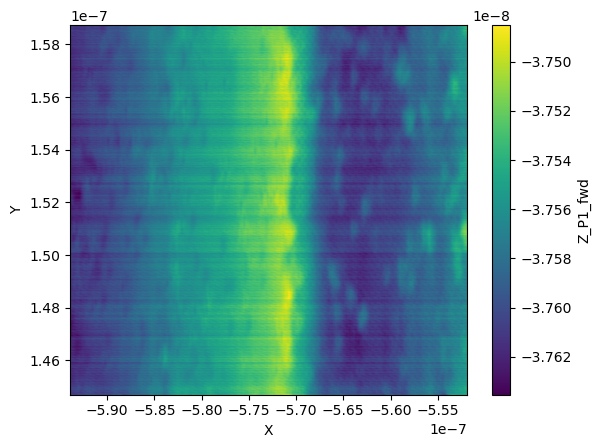

In [25]:
#ds_sxm.Z_fwd.plot()
#ds_sxm_1.Z_fwd.plot()
ds_sxm_1.Z_P1_fwd.plot()


In [32]:
ds_sxm_1= plane_fit_xr (ds_sxm,   
              ch ='Z_P1_fwd',
              method='y_fit',
              poly_order=3,
              overwrite=True)

<Axes: >

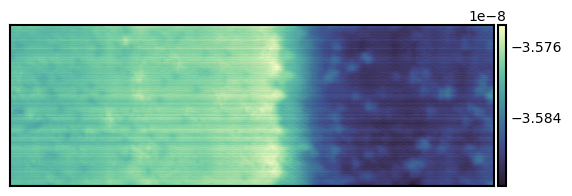

In [33]:
import seaborn_image as isns
isns.imshow(ds_sxm_1.Z_P1_fwd)

In [37]:
import numpy as np
import xarray as xr
from scipy.ndimage import gaussian_filter, label


def plateau_tilt_xr(
    ds: xr.Dataset,
    ch: str = "all",
    grad_sigma: float = 1.0,
    grad_threshold: float | None = None,
    min_plateau_area: int = 200,
    mask: np.ndarray | None = None,
    overwrite: bool = False,
    store_plateau_mask: bool = False,
):
    """
    Plateau (terrace) based tilt removal for 2D STM images (sxm).

    Notes
    -----
    - Only global linear tilt (a*x + b*y) is removed.
    - Absolute height offsets and step heights are preserved.
    - Plateau detection is gradient-based and may require tuning of grad_sigma.
    - If store_plateau_mask=True, detected plateau regions are stored
      in the output dataset for inspection.
    """

    if not isinstance(ds, xr.Dataset):
        raise TypeError("Input must be an xarray.Dataset")

    if ch == "all":
        ch_list = list(ds.data_vars)
    else:
        if ch not in ds.data_vars:
            raise ValueError(f"Channel '{ch}' not found")
        ch_list = [ch]

    out = ds.copy()

    for var in ch_list:
        da = ds[var]
        if da.ndim != 2:
            continue

        y_dim, x_dim = da.dims
        x = da[x_dim].values
        y = da[y_dim].values
        Z = da.values.astype(float)

        if mask is not None and mask.shape != Z.shape:
            raise ValueError("mask must have the same shape as the image")

        # -------------------------------------------------
        # Smoothing + gradient
        # -------------------------------------------------
        Z_smooth = gaussian_filter(Z, sigma=float(grad_sigma))
        dZdy, dZdx = np.gradient(Z_smooth, y, x)
        grad = np.sqrt(dZdx**2 + dZdy**2)

        if grad_threshold is None:
            grad_thr = np.nanmedian(grad) + 2.0 * np.nanstd(grad)
        else:
            grad_thr = float(grad_threshold)

        step_mask = grad > grad_thr
        plateau_mask = ~step_mask

        if mask is not None:
            plateau_mask &= mask

        labels, n_labels = label(plateau_mask)
        Xg, Yg = np.meshgrid(x, y)

        slopes = []
        areas = []

        # -------------------------------------------------
        # Plane fitting per plateau
        # -------------------------------------------------
        for lab in range(1, n_labels + 1):
            region = labels == lab
            area = int(np.count_nonzero(region))
            if area < min_plateau_area:
                continue

            xr_p = Xg[region]
            yr_p = Yg[region]
            zr_p = Z[region]

            A = np.column_stack([xr_p, yr_p, np.ones_like(xr_p)])
            coeff, _, _, _ = np.linalg.lstsq(A, zr_p, rcond=None)
            a_i, b_i, _ = coeff

            slopes.append((float(a_i), float(b_i)))
            areas.append(area)

        if not slopes:
            raise RuntimeError("No valid plateaus detected.")

        slopes = np.asarray(slopes)
        areas = np.asarray(areas)

        a_avg = float(np.average(slopes[:, 0], weights=areas))
        b_avg = float(np.average(slopes[:, 1], weights=areas))

        tilt_plane = a_avg * Xg + b_avg * Yg
        Z_corr = Z - tilt_plane

        out_da = xr.DataArray(
            Z_corr,
            coords=da.coords,
            dims=da.dims,
            attrs=da.attrs,
        )

        if overwrite:
            out[var] = out_da
        else:
            out[f"{var}_plateautilt"] = out_da

        # -------------------------------------------------
        # NetCDF-safe plateau attrs (unchanged)
        # -------------------------------------------------
        out.attrs[f"{var}_plateau_tilt_a_avg"] = float(a_avg)
        out.attrs[f"{var}_plateau_tilt_b_avg"] = float(b_avg)
        out.attrs[f"{var}_plateau_tilt_n_plateaus"] = int(len(areas))
        out.attrs[f"{var}_plateau_tilt_grad_sigma"] = float(grad_sigma)
        out.attrs[f"{var}_plateau_tilt_grad_threshold"] = float(grad_thr)
        out.attrs[f"{var}_plateau_tilt_min_plateau_area"] = int(min_plateau_area)

        # -------------------------------------------------
        # [OPTIONAL] Store plateau regions for inspection
        # -------------------------------------------------
        if store_plateau_mask:
            out[f"{var}_plateau_mask"] = xr.DataArray(
                plateau_mask,
                coords=da.coords,
                dims=da.dims,
            )
            out[f"{var}_plateau_labels"] = xr.DataArray(
                labels.astype(np.int32),
                coords=da.coords,
                dims=da.dims,
            )

    return out


In [63]:
ds_sxm_1= plateau_tilt_xr(ds_sxm_1, 
                ch ='Z_P1_fwd',grad_sigma = 20,
                          store_plateau_mask=True,
                overwrite=True)

In [64]:
#ds_sxm_1

<Axes: >

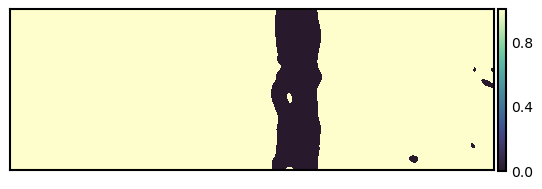

In [65]:
import seaborn_image as isns
#isns.imshow(ds_sxm_1.Z_P1_fwd)
isns.imshow(ds_sxm_1.Z_P1_fwd_plateau_mask)


<Axes: >

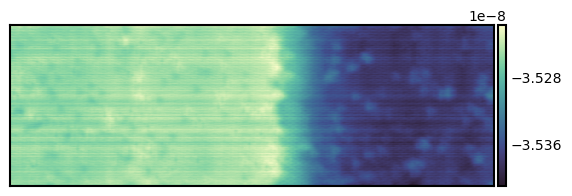

In [66]:
isns.imshow(ds_sxm_1.Z_P1_fwd)


## import twoDfft_xr

In [22]:
from spmpy.fft.twoDfft_xrft import twoDfft_xrft
ds_sxm_fft = twoDfft_xrft(ds_sxm_1)

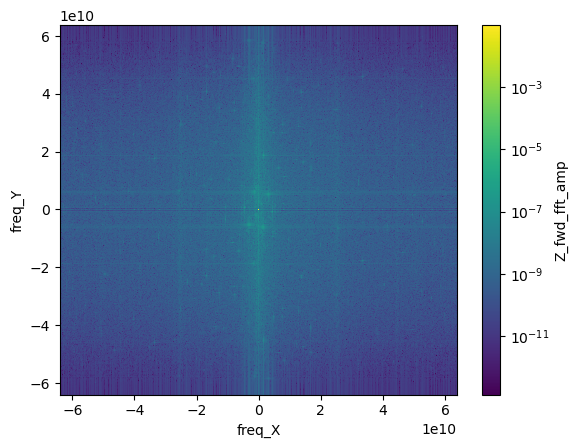

In [23]:
from matplotlib.colors import LogNorm
ds_sxm_fft.Z_fwd_fft_amp.plot(norm=LogNorm())



In [ ]:
ds_sxm_fft

In [ ]:
ds_sxm_1

In [ ]:
import numpy as np
np.save('test_array',ds_sxm.Z_fwd.to_numpy())

plane fit test 



# Plane fitting utilities for STM / SPM data (xarray based)

This notebook is intended to be placed under:

```
SPMpy/spmpy/preprocess/
```

Features:
- Mask-excluded plane fitting
- Polynomial order extension (1st, 2nd, 3rd)
- Supports xarray Dataset / DataArray
- Special handling for grid.nc (bias-dependent fitting)
- overwrite option for in-place correction



# Plane / Polynomial Background Fitting for STM-SPM Data (xarray)

**Location**
```
SPMpy/spmpy/preprocess/
```

This notebook provides a fully consistency-checked implementation of
plane / polynomial background removal for STM topography, current maps,
and grid spectroscopy data.

All fitting logic (x, y, surface; 1st–3rd order; mask semantics) has been
double-checked for correctness and internal consistency.


In [ ]:

import numpy as np
import xarray as xr

In [ ]:

def _polyfit_1d_with_mask(coord, data, order, mask):
    """
    Perform 1D polynomial fitting with explicit mask control.

    Mask semantics
    --------------
    mask == True  : included in fitting
    mask == False : excluded from fitting

    Notes
    -----
    - mask may be sparse (point-like selection).
    - If mask is None, all points are used.
    """
    if mask is None:
        mask = np.ones_like(data, dtype=bool)

    coeff = np.polyfit(coord[mask], data[mask], order)
    return np.polyval(coeff, coord)


def _polyfit_surface_with_mask(x, y, z, order, mask):
    """
    Perform 2D polynomial surface fitting with mask support.

    Supported polynomial orders
    ---------------------------
    order = 1 : z = ax + by + c
    order = 2 : quadratic surface
    order = 3 : cubic surface

    Mask semantics
    --------------
    mask == True  : included in fitting
    mask == False : excluded from fitting

    Notes
    -----
    - mask may be sparse or continuous.
    - If mask is None, the entire image is used.
    """
    X, Y = np.meshgrid(x, y)

    if mask is None:
        mask = np.ones_like(z, dtype=bool)

    Xf = X[mask]
    Yf = Y[mask]
    Zf = z[mask]

    if order == 1:
        A = np.column_stack([Xf, Yf, np.ones_like(Xf)])
    elif order == 2:
        A = np.column_stack([
            Xf**2, Yf**2, Xf*Yf,
            Xf, Yf, np.ones_like(Xf)
        ])
    elif order == 3:
        A = np.column_stack([
            Xf**3, Yf**3,
            Xf**2*Yf, Xf*Yf**2,
            Xf**2, Yf**2, Xf*Yf,
            Xf, Yf, np.ones_like(Xf)
        ])
    else:
        raise ValueError("poly_order must be 1, 2, or 3")

    coeff, _, _, _ = np.linalg.lstsq(A, Zf, rcond=None)

    if order == 1:
        surface = coeff[0]*X + coeff[1]*Y + coeff[2]
    elif order == 2:
        surface = (
            coeff[0]*X**2 + coeff[1]*Y**2 + coeff[2]*X*Y +
            coeff[3]*X + coeff[4]*Y + coeff[5]
        )
    elif order == 3:
        surface = (
            coeff[0]*X**3 + coeff[1]*Y**3 +
            coeff[2]*X**2*Y + coeff[3]*X*Y**2 +
            coeff[4]*X**2 + coeff[5]*Y**2 +
            coeff[6]*X*Y +
            coeff[7]*X + coeff[8]*Y + coeff[9]
        )

    return surface



In [ ]:

def plane_fit_xr(
    xrdata,
    ch='all',
    method='surface_fit',
    poly_order=1,
    mask=None,
    overwrite=False
):
    """
    Polynomial plane / surface background removal for STM-SPM data.

    This function applies polynomial background fitting to:
    - 2D STM images (x, y)
    - Grid spectroscopy data (bias_mV, y, x)

    Parameters
    ----------
    xrdata : xarray.Dataset or xarray.DataArray
        Input STM/SPM data. If a DataArray is given, it is converted
        internally to a Dataset. Output is always a Dataset.

    ch : str, default 'all'
        Channel selection.
        - 'all' : apply fitting to all data variables
        - specific variable name (e.g. 'I_fwd')

    method : {'x_fit', 'y_fit', 'surface_fit'}, default 'surface_fit'
        Background fitting method.
        - x_fit : polynomial fit along x direction (row-wise)
        - y_fit : polynomial fit along y direction (column-wise)
        - surface_fit : full 2D polynomial surface fit

    poly_order : int, default 1
        Polynomial order of fitting (1, 2, or 3).

    mask : ndarray of bool, optional
        Boolean mask specifying which pixels are INCLUDED in fitting.

        mask == True  → used for fitting
        mask == False → excluded from fitting

        Notes:
        - mask may be sparse (point mask).
        - If None, all pixels are used.

    overwrite : bool, default False
        Storage behavior.
        - False : fitted result stored as '{var}_planefit'
        - True  : overwrite original variable

    Special behavior (grid.nc)
    --------------------------
    If a variable contains a 'bias_mV' dimension, plane fitting is
    applied independently for each bias slice.

    Returns
    -------
    xarray.Dataset
        Dataset containing plane-fitted data.
    """

    if isinstance(xrdata, xr.DataArray):
        ds = xrdata.to_dataset(name=xrdata.name or 'data')
    elif isinstance(xrdata, xr.Dataset):
        ds = xrdata.copy()
    else:
        raise TypeError("Input must be xarray.Dataset or xarray.DataArray")

    if ch == 'all':
        ch_list = list(ds.data_vars)
    else:
        if ch not in ds.data_vars:
            raise ValueError(f"Channel '{ch}' not found")
        ch_list = [ch]

    for var in ch_list:
        da = ds[var]

        # --- grid spectroscopy case ---
        if 'bias_mV' in da.dims:
            fitted_stack = []

            for ib, b in enumerate(da.bias_mV.values):
                slice2d = da.isel(bias_mV=ib)
                slice_mask = None if mask is None else mask

                slice_out = plane_fit_xr(
                    slice2d,
                    ch=slice2d.name,
                    method=method,
                    poly_order=poly_order,
                    mask=slice_mask,
                    overwrite=True
                )

                fitted_stack.append(slice_out[slice2d.name].values)

            axis = da.dims.index('bias_mV')
            fitted = np.stack(fitted_stack, axis=axis)

            result = xr.DataArray(
                fitted,
                coords=da.coords,
                dims=da.dims,
                attrs=da.attrs
            )

        # --- pure 2D case ---
        else:
            data2d = da.values
            ny, nx = data2d.shape

            # use coordinate values if available
            x = da.coords[da.dims[1]].values if len(da.dims) == 2 else np.arange(nx)
            y = da.coords[da.dims[0]].values if len(da.dims) == 2 else np.arange(ny)

            if method == 'surface_fit':
                surface = _polyfit_surface_with_mask(x, y, data2d, poly_order, mask)
                result = data2d - surface

            elif method == 'x_fit':
                result = np.zeros_like(data2d)
                for iy in range(ny):
                    row_mask = None if mask is None else mask[iy]
                    fit = _polyfit_1d_with_mask(x, data2d[iy], poly_order, row_mask)
                    result[iy] = data2d[iy] - fit

            elif method == 'y_fit':
                result = np.zeros_like(data2d)
                for ix in range(nx):
                    col_mask = None if mask is None else mask[:, ix]
                    fit = _polyfit_1d_with_mask(y, data2d[:, ix], poly_order, col_mask)
                    result[:, ix] = data2d[:, ix] - fit

            else:
                raise ValueError("Invalid method")

            result = xr.DataArray(
                result,
                coords=da.coords,
                dims=da.dims,
                attrs=da.attrs
            )

        if overwrite:
            ds[var] = result
        else:
            ds[f"{var}_planefit"] = result

    return ds



In [ ]:
ds_out = plane_fit_xr(
    ds_grid,
    ch='all',
   # method='surface_fit',
    method='surface_fit',
    poly_order=3,
    mask=None,
    overwrite=False
)

In [ ]:
ds_out

In [ ]:
ds_out.I_fwd.sel(bias_mV=0).plot()

In [ ]:
ds_sxm

In [ ]:
ds_sxm.Z_fwd.plot()

In [ ]:
ds_out = plane_fit_xr(
    ds_sxm,
    ch='Z_fwd',
    #method='surface_fit',
    method='y_fit',
    poly_order=3,
    mask=None,
    overwrite=False
)

In [ ]:
ds_sxm

In [ ]:
ds_out.Z_fwd_planefit.plot()

fft

### used codes,  remove them later 

In [ ]:
ds_sxm_1=plane_fit_xr(ds_sxm, 
                    ch='all',
                    #method='surface_fit',
                    method='y_fit',
                    poly_order=3,
                    mask=None,
                    overwrite=True,)

In [ ]:
ds_sxm

In [ ]:
ds_sxm.to_netcdf('ds_sxm_cu.nc')

In [ ]:
ds_iso = interpolate2D_xr(ds_sxm)

In [ ]:
ds_iso.to_netcdf('ds_iso_cu.nc')

In [ ]:

z = ds["Z_fwd"].values

# Basic checks
nan_count = int(np.isnan(z).sum())
inf_count = int(np.isinf(z).sum())

# Percentiles to see typical scale
pcts = np.nanpercentile(z, [0, 0.1, 1, 50, 99, 99.9, 100])

nan_count, inf_count, pcts

In [ ]:
ds_iso.to_netcdf('ds_iso_cu.nc')

In [ ]:
ds_iso.Z_fwd.plot()

In [ ]:
ds_corr = plateau_tilt_xr(
    ds_iso,
    #ch="Z_fwd",
    ch='all',
    grad_sigma=1.0,
    min_plateau_area=300,
    overwrite=True
)

#ds_corr.Z_fwd_plateautilt.plot()

In [ ]:
ds_corr.Z_fwd.plot()

In [ ]:
diff = ds_corr["Z_fwd_plateautilt"] - ds_sxm["Z_fwd"]
diff.plot()

In [ ]:
#ds_corr
ds_sxm_1=plane_fit_xr(ds_corr, 
                    ch='all',
                    #method='surface_fit',
                    method='y_fit',
                    poly_order=3,
                    mask=None,
                    overwrite=True,)

In [ ]:
ds_sxm_1.Z_fwd.plot()
ds_sxm_1.to_netcdf('ds_sxm_HOPG.nc')